In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# create a dataframe to store results
results = pd.DataFrame()
# use a for loop to read all csv files
inputs = pd.read_csv('exp_noise_doe_experiments_input.csv', index_col=0)
# read the outpout
outputs = pd.read_csv('exp_noise_doe_experiments_output.csv', index_col=0)

# merge the inputs and outputs
results = pd.concat([inputs, outputs], axis=1)

In [16]:
results["learned_noise_std"] = np.abs(results["learned_noise_std"]-0.1)

In [17]:
# get a subset of the data with method = 'cokriging', "hk","scaled_kriging", "mf_rbf_gpr"
mf_rbf_gpr_results = results[results['method'] == 'mf_rbf_gpr']
#
cokriging_results = results[results['method'] == 'cokriging']
hk_results = results[results['method'] == 'hk']
scaled_kriging_results = results[results['method']
                                 == 'scaled_kriging']

In [18]:
mf_rbf_gpr_results

,method,noise_std,num_hf,num_lf,problem,seed,normalized_mae,normalized_rmse,r2,mean_log_likelihood,lf_training_time,hf_training_time,inference_time,learned_noise_std
300,mf_rbf_gpr,0.1,5,200,mf_Bohachevsky,1,0.750074,0.084801,0.982591,-7.510879,5.513819,0.270888,0.016796,0.099836
301,mf_rbf_gpr,0.1,10,200,mf_Bohachevsky,1,0.384088,0.046604,0.994742,-0.977926,6.118564,0.725021,0.019710,0.328290
302,mf_rbf_gpr,0.1,15,200,mf_Bohachevsky,1,0.110215,0.022780,0.998744,-0.846549,6.605998,0.972125,0.018858,0.302378
303,mf_rbf_gpr,0.1,20,200,mf_Bohachevsky,1,0.104613,0.019813,0.999050,-0.752558,5.549541,1.252791,0.018577,0.408311
304,mf_rbf_gpr,0.1,25,200,mf_Bohachevsky,1,0.120998,0.013314,0.999571,-0.284663,4.694975,1.370812,0.018381,0.162945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,mf_rbf_gpr,0.1,10,200,mf_Sixhump,5,0.404475,0.064034,0.997811,-0.703977,8.796238,0.867807,0.016985,0.239788
596,mf_rbf_gpr,0.1,15,200,mf_Sixhump,5,0.559646,0.085695,0.996080,-0.879062,7.246636,0.964944,0.017907,0.349352
597,mf_rbf_gpr,0.1,20,200,mf_Sixhump,5,0.487944,0.044001,0.998966,0.031474,8.174940,1.331578,0.020670,0.027427
598,mf_rbf_gpr,0.1,25,200,mf_Sixhump,5,0.523744,0.045359,0.998902,-0.048653,6.028923,1.722892,0.020942,0.030225


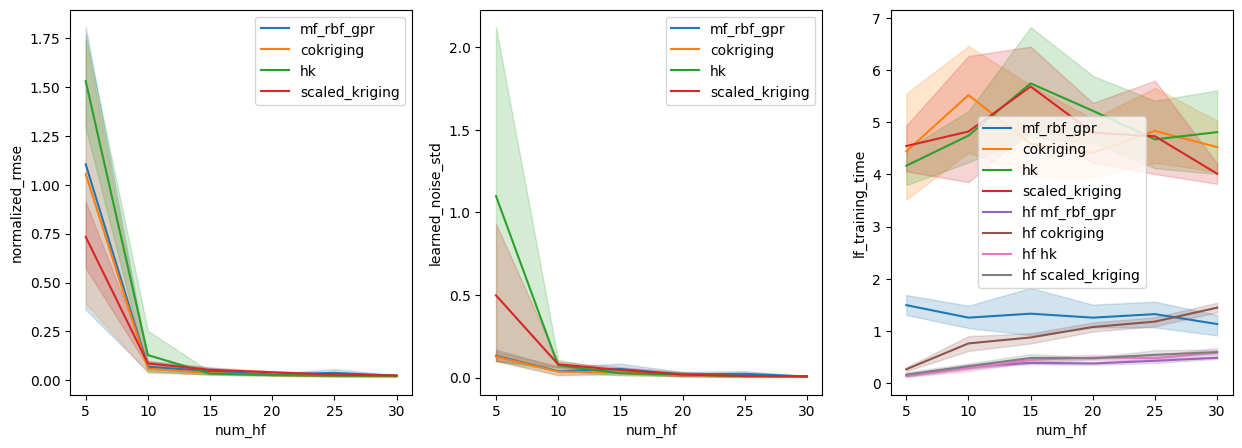

In [27]:
problem = 'Forrester_1b'


fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# plot the results for problem mf_Sixhump
sns.lineplot(data= mf_rbf_gpr_results[mf_rbf_gpr_results['problem'] == problem], x='num_hf',
             y='normalized_rmse',  label='mf_rbf_gpr', ax=ax[0])
sns.lineplot(data=cokriging_results[cokriging_results["problem"] == problem], x='num_hf',
             y='normalized_rmse',  label='cokriging', ax=ax[0])
sns.lineplot(data=hk_results[hk_results['problem']==problem], x='num_hf',
             y='normalized_rmse', ax=ax[0], label='hk')
sns.lineplot(data=scaled_kriging_results[scaled_kriging_results['problem']==problem], x='num_hf',
             y='normalized_rmse', ax=ax[0], label='scaled_kriging')

# plot the mean_log_likelihood
sns.lineplot(data= mf_rbf_gpr_results[mf_rbf_gpr_results['problem'] == problem], x='num_hf',
             y='learned_noise_std',  label='mf_rbf_gpr', ax=ax[1])
sns.lineplot(data=cokriging_results[cokriging_results["problem"] == problem], x='num_hf',
                y='learned_noise_std',  label='cokriging', ax=ax[1])
sns.lineplot(data=hk_results[hk_results['problem']==problem], x='num_hf',
                y='learned_noise_std', ax=ax[1], label='hk')
sns.lineplot(data=scaled_kriging_results[scaled_kriging_results['problem']==problem], x='num_hf',
                y='learned_noise_std', ax=ax[1], label='scaled_kriging')

# plot the lf and hf training time for the problem mf_Sixhump
sns.lineplot(data= mf_rbf_gpr_results[mf_rbf_gpr_results['problem'] == problem], x='num_hf',
             y='lf_training_time',  label='mf_rbf_gpr', ax=ax[2])
sns.lineplot(data=cokriging_results[cokriging_results["problem"] == problem], x='num_hf',
                y='lf_training_time',  label='cokriging', ax=ax[2])
sns.lineplot(data=hk_results[hk_results['problem']==problem], x='num_hf',
                y='lf_training_time', ax=ax[2], label='hk')
sns.lineplot(data=scaled_kriging_results[scaled_kriging_results['problem']==problem], x='num_hf',
                y='lf_training_time', ax=ax[2], label='scaled_kriging')
# plot the hf training time in the same figure 
sns.lineplot(data= mf_rbf_gpr_results[mf_rbf_gpr_results['problem'] == problem], x='num_hf',
             y='hf_training_time',  label='hf mf_rbf_gpr', ax=ax[2])
sns.lineplot(data=cokriging_results[cokriging_results["problem"] == problem], x='num_hf',
                y='hf_training_time',  label='hf cokriging', ax=ax[2])
sns.lineplot(data=hk_results[hk_results['problem']==problem], x='num_hf',
                y='hf_training_time', ax=ax[2], label='hf hk')
sns.lineplot(data=scaled_kriging_results[scaled_kriging_results['problem']==problem], x='num_hf',
                y='hf_training_time', ax=ax[2], label='hf scaled_kriging')

# shoe the plot 
plt.show()


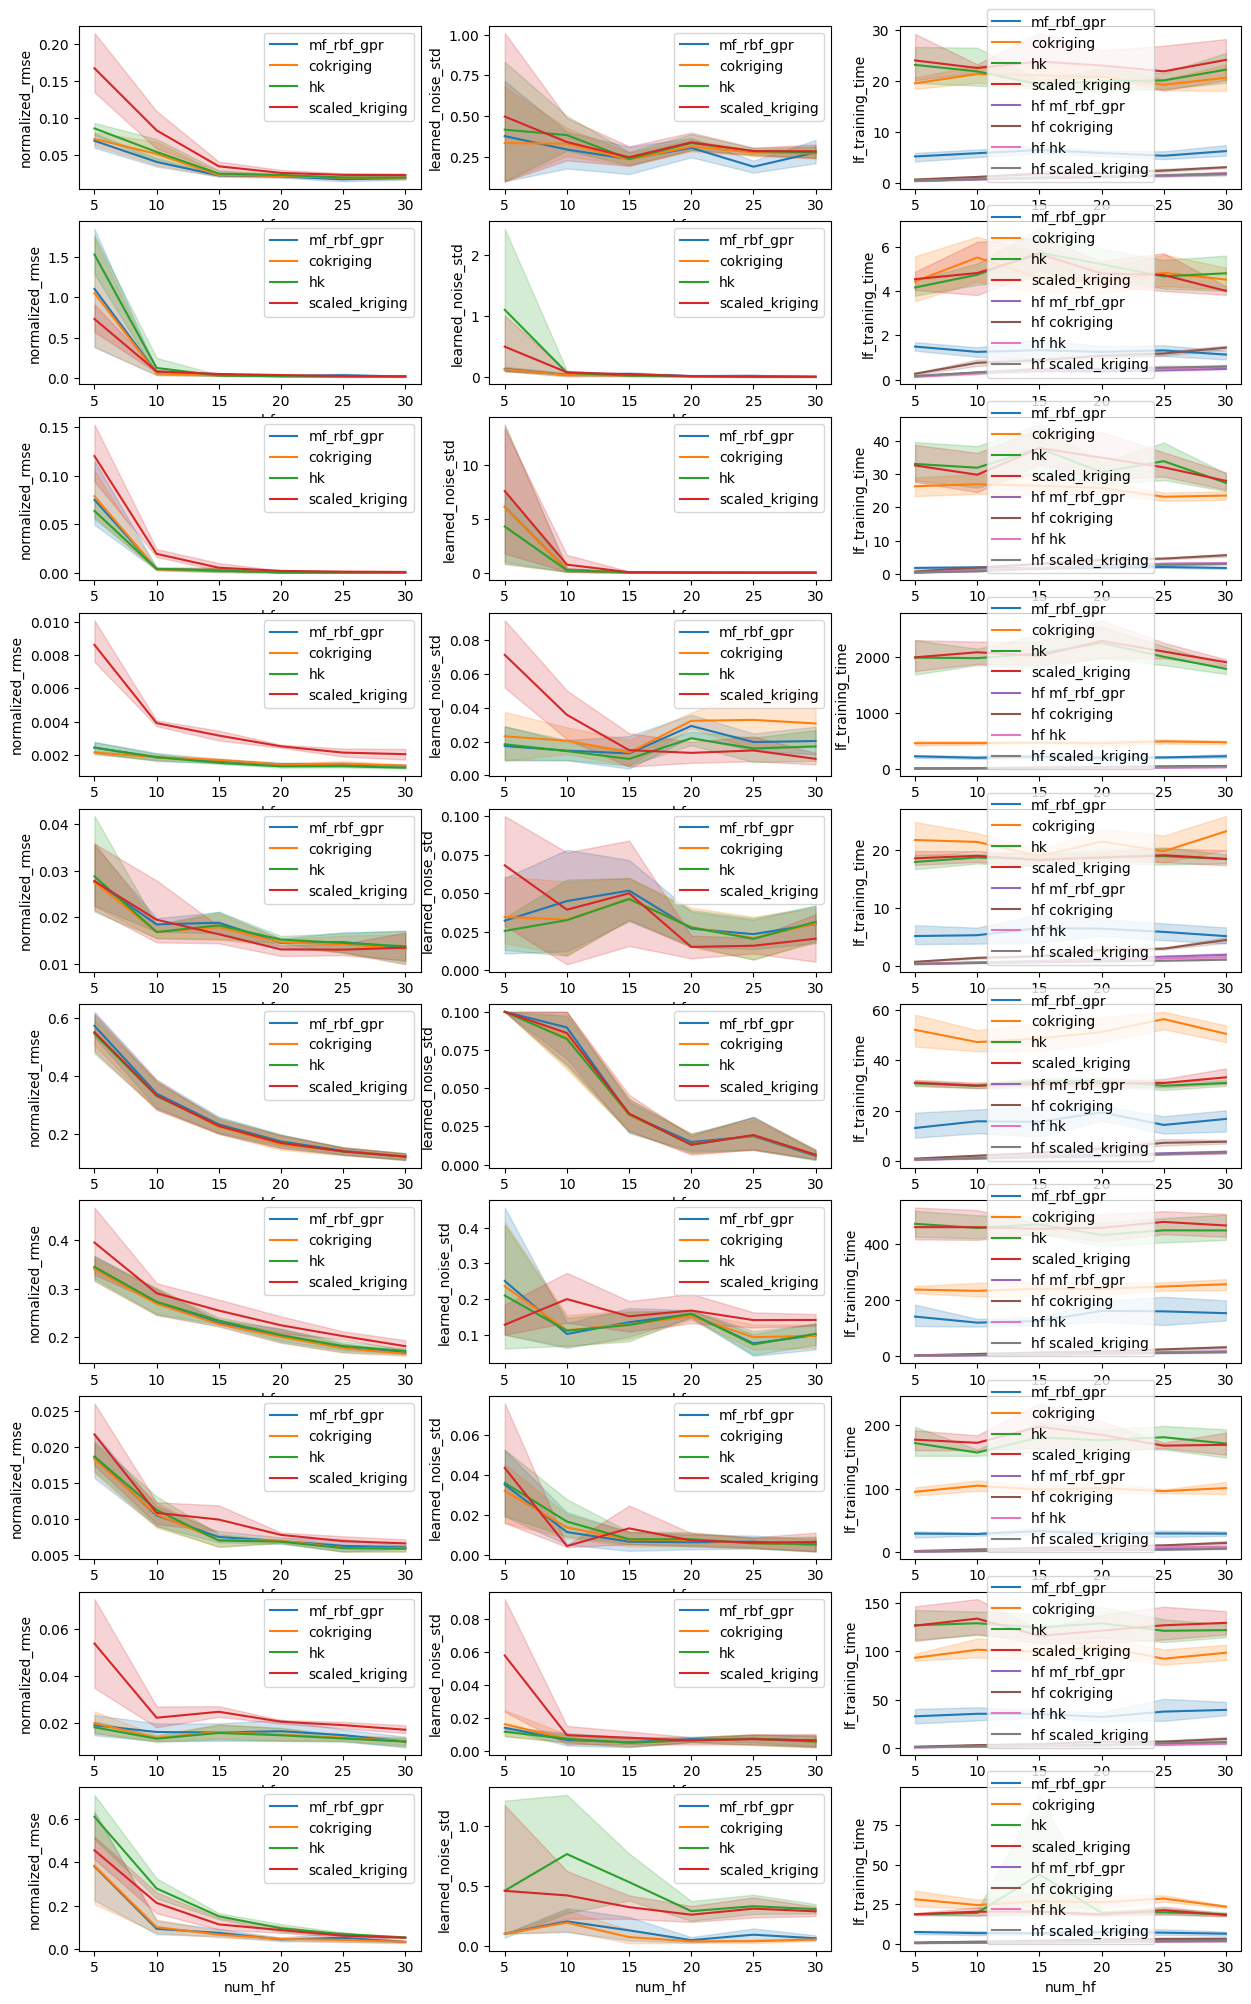

In [28]:
# give me a figure with (10, 3) plots so that the above figure can go over all the problems
fig, ax = plt.subplots(10, 3, figsize=(15, 25))

for i, problem in enumerate(results['problem'].unique()):
    # plot the results for problem mf_Sixhump
    sns.lineplot(data= mf_rbf_gpr_results[mf_rbf_gpr_results['problem'] == problem], x='num_hf',
                y='normalized_rmse',  label='mf_rbf_gpr', ax=ax[i, 0])
    sns.lineplot(data=cokriging_results[cokriging_results["problem"] == problem], x='num_hf',
                y='normalized_rmse',  label='cokriging', ax=ax[i,0])
    sns.lineplot(data=hk_results[hk_results['problem']==problem], x='num_hf',
                y='normalized_rmse', ax=ax[i,0], label='hk')
    sns.lineplot(data=scaled_kriging_results[scaled_kriging_results['problem']==problem], x='num_hf',
                y='normalized_rmse', ax=ax[i, 0], label='scaled_kriging')

    # plot the mean_log_likelihood
    sns.lineplot(data= mf_rbf_gpr_results[mf_rbf_gpr_results['problem'] == problem], x='num_hf',
                y='learned_noise_std',  label='mf_rbf_gpr', ax=ax[i, 1])
    sns.lineplot(data=cokriging_results[cokriging_results["problem"] == problem], x='num_hf',
                    y='learned_noise_std',  label='cokriging', ax=ax[i, 1])
    sns.lineplot(data=hk_results[hk_results['problem']==problem], x='num_hf',
                    y='learned_noise_std', ax=ax[i, 1], label='hk')
    sns.lineplot(data=scaled_kriging_results[scaled_kriging_results['problem']==problem], x='num_hf',
                    y='learned_noise_std', ax=ax[i, 1], label='scaled_kriging')

    # plot the lf and hf training time for the problem mf_Sixhump
    sns.lineplot(data= mf_rbf_gpr_results[mf_rbf_gpr_results['problem'] == problem], x='num_hf',
                y='lf_training_time',  label='mf_rbf_gpr', ax=ax[i, 2])
    sns.lineplot(data=cokriging_results[cokriging_results["problem"] == problem], x='num_hf',
                    y='lf_training_time',  label='cokriging', ax=ax[i, 2])
    sns.lineplot(data=hk_results[hk_results['problem']==problem], x='num_hf',
                    y='lf_training_time', ax=ax[i, 2], label='hk')
    sns.lineplot(data=scaled_kriging_results[scaled_kriging_results['problem']==problem], x='num_hf',
                    y='lf_training_time', ax=ax[i, 2], label='scaled_kriging')
    # plot the hf training time in the same figure 
    sns.lineplot(data= mf_rbf_gpr_results[mf_rbf_gpr_results['problem'] == problem], x='num_hf',
                y='hf_training_time',  label='hf mf_rbf_gpr', ax=ax[i, 2])
    sns.lineplot(data=cokriging_results[cokriging_results["problem"] == problem], x='num_hf',
                    y='hf_training_time',  label='hf cokriging', ax=ax[i, 2])
    sns.lineplot(data=hk_results[hk_results['problem']==problem], x='num_hf',
                    y='hf_training_time', ax=ax[i,2], label='hf hk')
    sns.lineplot(data=scaled_kriging_results[scaled_kriging_results['problem']==problem], x='num_hf',
                    y='hf_training_time', ax=ax[i, 2], label='hf scaled_kriging')
# shoe the plot 
plt.show()


In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot normalized RMSE on the left y-axis
color = "tab:blue"
ax1.set_xlabel("Number of evaluations")
ax1.set_ylabel("Normalized RMSE", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    palette="colorblind",
    marker="^",
    legend="full",
    linewidth=2,
    y="mf_normalized_rmse",
    hue="noise_std",
    ax=ax1,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_normalized_rmse",
    ax=ax1,
)
ax1.tick_params(axis="y", labelcolor=color)

ax1.get_legend().remove()

# Create another y-axis for log likelihood
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Log Likelihood", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="^",
    legend="full",
    y="mf_mean_log_likelihood",
    ax=ax2,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_mean_log_likelihood",
    ax=ax2,
)
ax2.tick_params(axis="y", labelcolor=color)
ax2.get_legend().remove()
# set the legend scale of the right y-axis into log scale
# ax2.set_yscale('log')

# add legend

plt.show()

In [ ]:
# problem information
problem_sets = [
    "Bohachevsky",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]
dimensions = [2, 2, 8, 2, 3, 6, 4, 4, 2]
r2 = [0.857, 0.925, 1.000, 0.997, -0.196, 0.712, 0.994, 1.0000, 0.833]

# # set r2 to have 3 decimal places
# r2 = [round(i, 3) for i in r2]
# print(r2)

In [ ]:
problem_set = mf_rbf_gpr_results["problem"].unique()

font_size = 14
fig, ax = plt.subplots(3, 3, figsize=(16, 9))
# for problem in problem_set:

for ii in range(3):
    for jj in range(3):
        problem = problem_set[ii * 3 + jj]
        result = mf_rbf_gpr_results[(mf_rbf_gpr_results["problem"] == problem)]
        # Plot normalized RMSE on the left y-axis
        color = "tab:blue"
        if ii == 2:
            ax[ii, jj].set_xlabel(
                "number of HF samples (d)", fontsize=font_size)
        else:
            ax[ii, jj].set_xlabel(" ")
        if jj == 0:
            ax[ii, jj].set_ylabel("NRMSE", color=color)
        else:
            ax[ii, jj].set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_normalized_rmse",
            hue="noise_std",
            ax=ax[ii, jj],
            err_style="bars",
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linewidth=2,
            linestyle="dashed",
            y="sf_normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
        )
        ax[ii, jj].tick_params(axis="y", labelcolor=color)
        ax[ii, jj].get_legend().remove()
        # Create another y-axis for log likelihood
        ax2 = ax[ii, jj].twinx()
        color = "tab:red"
        if jj == 2:
            ax2.set_ylabel("Log Likelihood", color=color, fontsize=font_size)
        else:
            ax2.set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_mean_log_likelihood",
            err_style="bars",
            ax=ax2,
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linestyle="dashed",
            linewidth=2,
            err_style="bars",
            y="sf_mean_log_likelihood",
            ax=ax2,
        )
        ax2.tick_params(axis="y", labelcolor=color)
        # remove the legend of ax2
        if ii == 2 and jj == 2:
            ax2.legend(fontsize=12)
        else:
            ax2.get_legend().remove()

        # set the font of axis and y-axis precision
        ax[ii, jj].tick_params(axis="both", which="major", labelsize=font_size)
        ax2.tick_params(axis="both", which="major", labelsize=font_size)
        # set the line width of the axis
        for axis in ["top", "bottom", "left", "right"]:
            ax[ii, jj].spines[axis].set_linewidth(1.5)
        ax2.spines["right"].set_linewidth(1.5)
        # get title info
        title = (
            problem_sets[ii * 3 + jj]
            + " (d="
            + str(dimensions[ii * 3 + jj])
            + ", r="
            + str(r2[ii * 3 + jj])
            + ")"
        )
        ax[ii, jj].set_title(title)
        # set space between subplots
        plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.savefig("gpr_comparison_at_200lf_samples.png",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.svg",
            dpi=300, bbox_inches="tight")
plt.show()

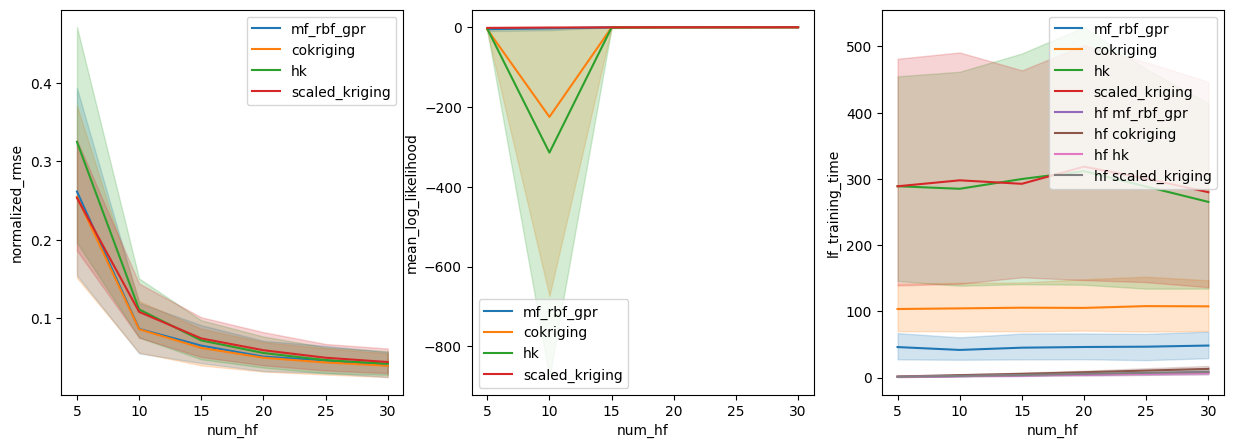

In [26]:


fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# plot the results for problem mf_Sixhump
sns.lineplot(data= mf_rbf_gpr_results, x='num_hf',
             y='normalized_rmse',  label='mf_rbf_gpr', ax=ax[0])
sns.lineplot(data=cokriging_results, x='num_hf',
             y='normalized_rmse',  label='cokriging', ax=ax[0])
sns.lineplot(data=hk_results, x='num_hf',
             y='normalized_rmse', ax=ax[0], label='hk')
sns.lineplot(data=scaled_kriging_results, x='num_hf',
             y='normalized_rmse', ax=ax[0], label='scaled_kriging')

# plot the mean_log_likelihood
sns.lineplot(data= mf_rbf_gpr_results, x='num_hf',
             y='mean_log_likelihood',  label='mf_rbf_gpr', ax=ax[1])
sns.lineplot(data=cokriging_results, x='num_hf',
                y='mean_log_likelihood',  label='cokriging', ax=ax[1])
sns.lineplot(data=hk_results, x='num_hf',
                y='mean_log_likelihood', ax=ax[1], label='hk')
sns.lineplot(data=scaled_kriging_results, x='num_hf',
                y='mean_log_likelihood', ax=ax[1], label='scaled_kriging')

# plot the lf and hf training time for the problem mf_Sixhump
sns.lineplot(data= mf_rbf_gpr_results, x='num_hf',
             y='lf_training_time',  label='mf_rbf_gpr', ax=ax[2])
sns.lineplot(data=cokriging_results, x='num_hf',
                y='lf_training_time',  label='cokriging', ax=ax[2])
sns.lineplot(data=hk_results, x='num_hf',
                y='lf_training_time', ax=ax[2], label='hk')
sns.lineplot(data=scaled_kriging_results, x='num_hf',
                y='lf_training_time', ax=ax[2], label='scaled_kriging')
# plot the hf training time in the same figure 
sns.lineplot(data= mf_rbf_gpr_results, x='num_hf',
             y='hf_training_time',  label='hf mf_rbf_gpr', ax=ax[2])
sns.lineplot(data=cokriging_results, x='num_hf',
                y='hf_training_time',  label='hf cokriging', ax=ax[2])
sns.lineplot(data=hk_results, x='num_hf',
                y='hf_training_time', ax=ax[2], label='hf hk')
sns.lineplot(data=scaled_kriging_results, x='num_hf',
                y='hf_training_time', ax=ax[2], label='hf scaled_kriging')

# shoe the plot 
plt.show()
